<a href="https://colab.research.google.com/github/thachthaolee/M1-GestionProjet/blob/main/Classif_binaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from IPython.display import Image
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
print('hello')

hello


In [ ]:
BATCH_SIZE = 10
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
data_path = "../Donnees/Data_classif_binaire"
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset="training",
    seed = 0,
    image_size = (IMAGE_HEIGHT,IMAGE_WIDTH),
    batch_size = BATCH_SIZE
)

validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset="validation",
    seed = 0,
    image_size = (IMAGE_HEIGHT,IMAGE_WIDTH),
    batch_size = BATCH_SIZE
)

class_names = train_data.class_names

Found 455 files belonging to 2 classes.
Using 364 files for training.
Found 455 files belonging to 2 classes.
Using 91 files for validation.


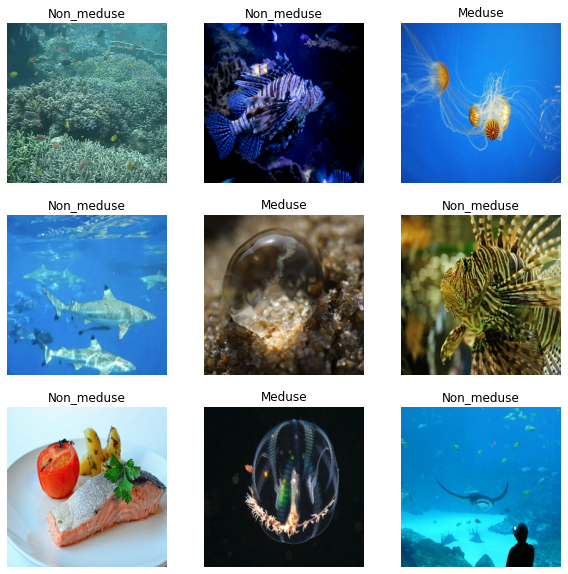

In [ ]:
plt.figure(figsize=(10,10))
for images, labels in train_data.take(1): #Pour prendre le premier batch du dataset
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")

In [ ]:
num_classes = 2

model = Sequential([
  layers.Rescaling(1./255, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)       

In [ ]:
epochs=10
history = model.fit(
  train_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/10
37/37 [==============================] - 20s 444ms/step - loss: 0.8267 - accuracy: 0.7912 - val_loss: 0.4102 - val_accuracy: 0.8571
Epoch 2/10
37/37 [==============================] - 19s 441ms/step - loss: 0.3790 - accuracy: 0.8599 - val_loss: 0.3234 - val_accuracy: 0.8791
Epoch 3/10
37/37 [==============================] - 20s 465ms/step - loss: 0.3905 - accuracy: 0.8681 - val_loss: 0.3102 - val_accuracy: 0.8681
Epoch 4/10
37/37 [==============================] - 20s 472ms/step - loss: 0.2837 - accuracy: 0.8956 - val_loss: 0.2698 - val_accuracy: 0.8791
Epoch 5/10
37/37 [==============================] - 20s 455ms/step - loss: 0.2343 - accuracy: 0.9203 - val_loss: 0.2812 - val_accuracy: 0.9011
Epoch 6/10
37/37 [==============================] - 18s 416ms/step - loss: 0.1554 - accuracy: 0.9533 - val_loss: 0.3262 - val_accuracy: 0.8571
Epoch 7/10
37/37 [==============================] - 17s 404ms/step - loss: 0.1306 - accuracy: 0.9533 - val_loss: 0.3670 - val_accuracy: 0.8681

In [ ]:
#Vérifier si tous les formats d'images sont correct

from pathlib import Path
import imghdr

image_extensions = [".png", ".jpg",".jpeg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_path).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")


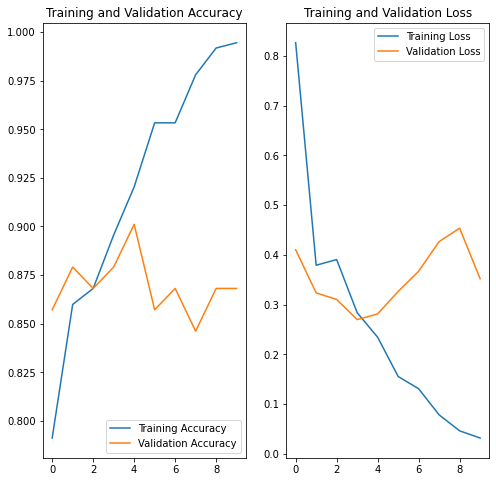

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Surapprentissage
